In [1]:
# Sam Brown
# sam_brown@mines.edu
# 05/23/2025
# Goal: Perform some EDA on the time feature (NOTE: mostly insignificant besides days since last event due to tide patterns)

# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import my_lib.funcs
# Set path to event files
evts_path = "/Users/sambrown04/Documents/SURF/Events/2010_2010Events2stas"

In [2]:
# storing events in data frame for use
events_list = my_lib.funcs.load_evt(evts_path)
events_list[0].head()

,Unnamed: 0,time,la01x,la01y,la01z,la01res,la01res_avg,la02x,la02y,la02z,...,ws05res,ws05res_avg,slw1x,slw1y,slw1z,slw1res,slw1res_avg,sum_res_avg,ressum,event
0,1854301,2010-11-18 23:03:00,-269289.563340,-556078.716693,92.3913,0.564852,0.540806,-277716.670621,-560500.283508,92.8241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.579589,2.604168,1.0
1,1854302,2010-11-18 23:03:15,-269289.565888,-556078.707728,92.3959,0.564852,0.540806,-277716.671290,-560500.273384,92.8414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.579589,2.671480,1.0
2,1854303,2010-11-18 23:03:30,-269289.562217,-556078.722279,92.3846,0.564852,0.540806,-277716.670982,-560500.281640,92.8318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.579589,2.682214,1.0
3,1854304,2010-11-18 23:03:45,-269289.564701,-556078.723765,92.3648,0.621760,0.540806,-277716.667992,-560500.283122,92.8137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.579589,2.771749,1.0
4,1854305,2010-11-18 23:04:00,-269289.563825,-556078.719483,92.3863,0.621760,0.540806,-277716.665632,-560500.277538,92.8293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.579589,2.771749,1.0


In [9]:
start_times = []
for event in events_list:
    start_times.append(event['time'][0])
    

In [11]:
time_series = pd.to_datetime(start_times)

df = pd.DataFrame({'start_time': time_series})

In [13]:
df['hour'] = df['start_time'].dt.hour
df['day_of_week'] = df['start_time'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['start_time'].dt.month
df['date'] = df['start_time'].dt.date

([<matplotlib.axis.XTick at 0x15464e3d0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

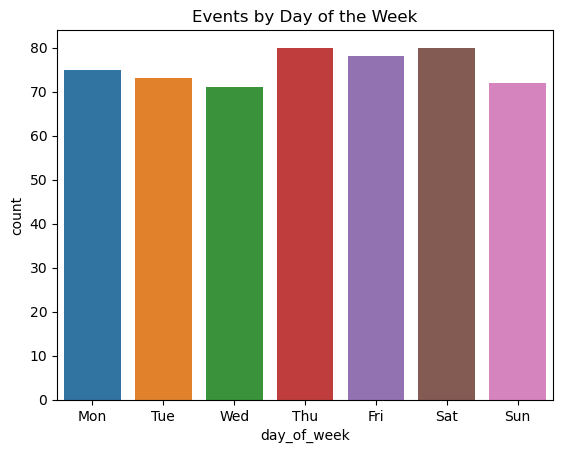

In [9]:
sns.countplot(x='day_of_week', data=df)
plt.title("Events by Day of the Week")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

Text(0.5, 23.52222222222222, 'Hour of Day')

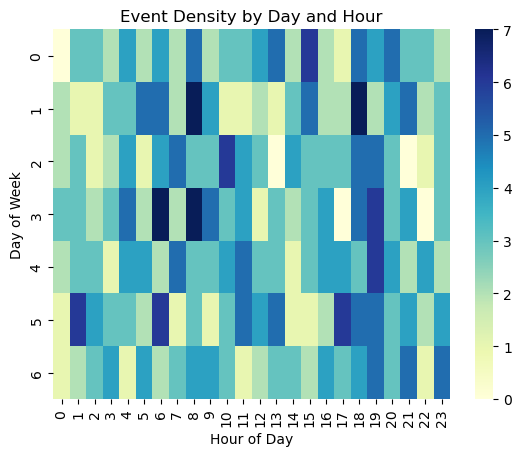

In [10]:
pivot = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Event Density by Day and Hour')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')

In [15]:
df = df.sort_values('start_time').reset_index(drop=True)

In [17]:
df['time_diff_min'] = df['start_time'].diff().dt.total_seconds() / 60
df

,start_time,hour,day_of_week,month,date,time_diff_min
0,2010-01-01 15:25:30,15,4,1,2010-01-01,NaN
1,2010-01-01 23:58:00,23,4,1,2010-01-01,512.50
2,2010-01-02 17:15:45,17,5,1,2010-01-02,1037.75
3,2010-01-03 16:18:30,16,6,1,2010-01-03,1382.75
4,2010-01-03 23:43:30,23,6,1,2010-01-03,445.00
...,...,...,...,...,...,...
524,2010-12-29 17:08:00,17,2,12,2010-12-29,546.25
525,2010-12-30 09:38:00,9,3,12,2010-12-30,990.00
526,2010-12-30 19:08:00,19,3,12,2010-12-30,570.00
527,2010-12-31 11:03:00,11,4,12,2010-12-31,955.00


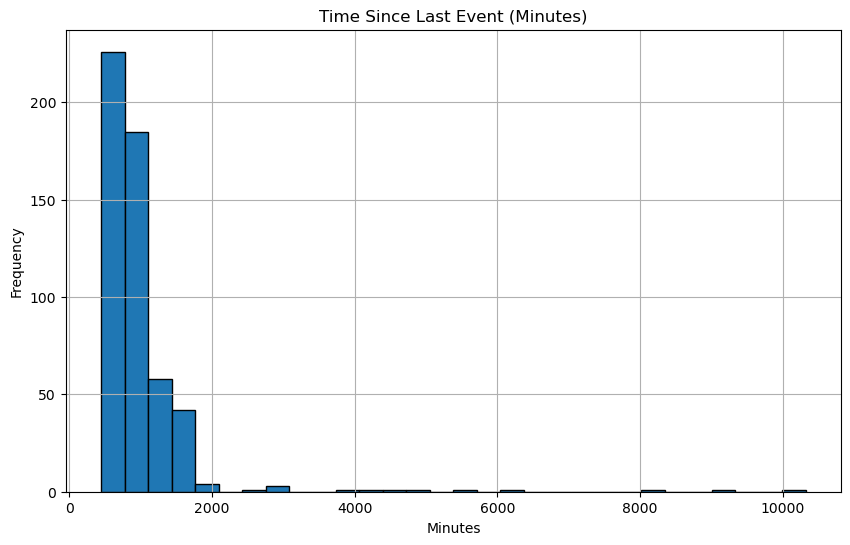

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(df['time_diff_min'][1:], bins=30, edgecolor='black')  # skip first NaN or 0
plt.title("Time Since Last Event (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [21]:
outliers = df[df['time_diff_min'] > 2000]
outliers

,start_time,hour,day_of_week,month,date,time_diff_min
281,2010-06-23 23:44:45,23,2,6,2010-06-23,6050.00
290,2010-07-01 04:44:45,4,3,7,2010-07-01,4455.00
292,2010-07-03 21:14:45,21,5,7,2010-07-03,2660.00
316,2010-07-20 02:14:00,2,1,7,2010-07-20,2904.25
317,2010-07-23 10:00:30,10,4,7,2010-07-23,4786.50
322,2010-07-29 06:39:00,6,3,7,2010-07-29,4019.25
323,2010-08-03 20:49:45,20,1,8,2010-08-03,8050.75
335,2010-08-12 23:34:00,23,3,8,2010-08-12,2789.25
336,2010-08-16 21:56:30,21,0,8,2010-08-16,5662.50
338,2010-08-24 09:44:45,9,1,8,2010-08-24,10323.00


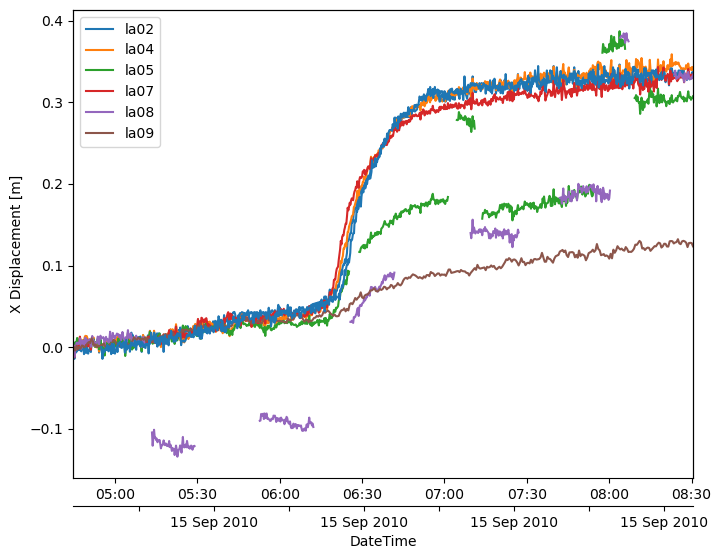

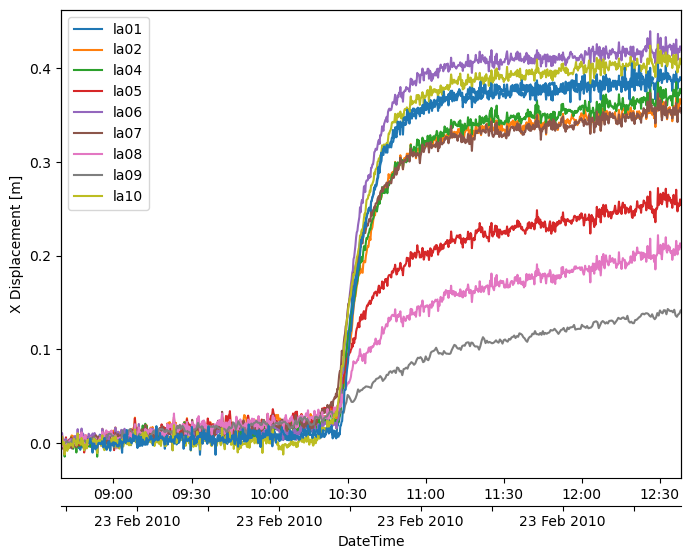

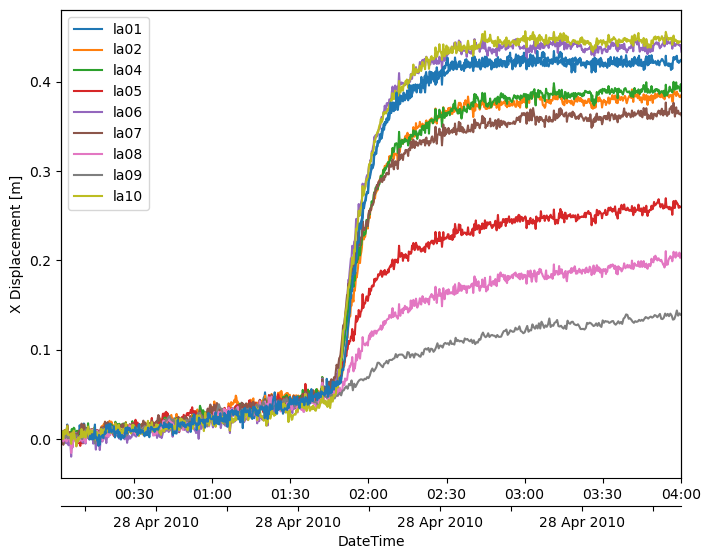

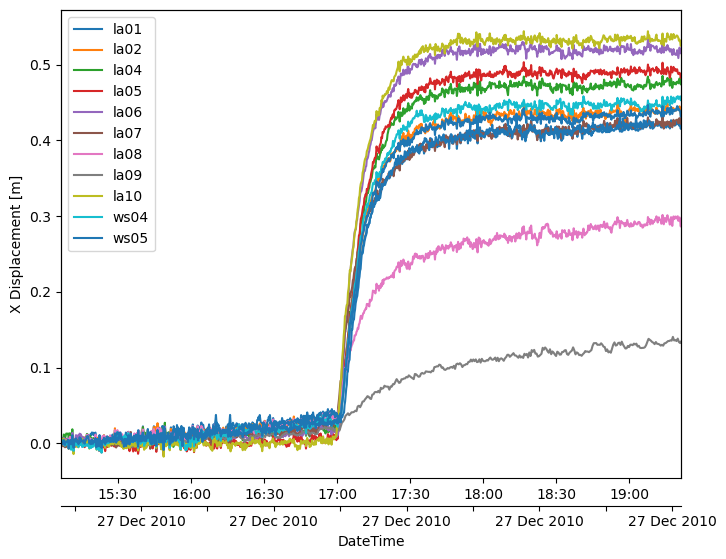

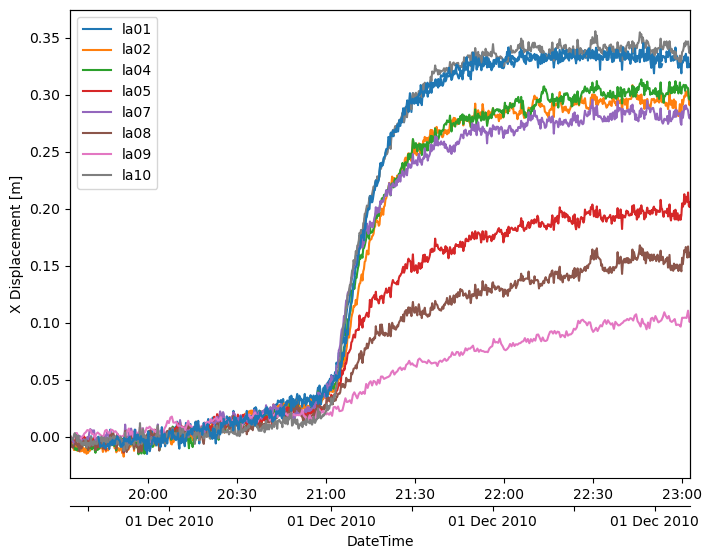

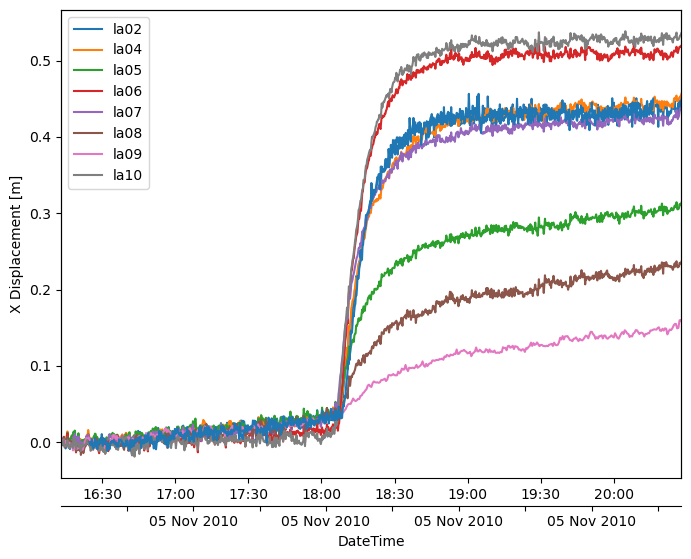

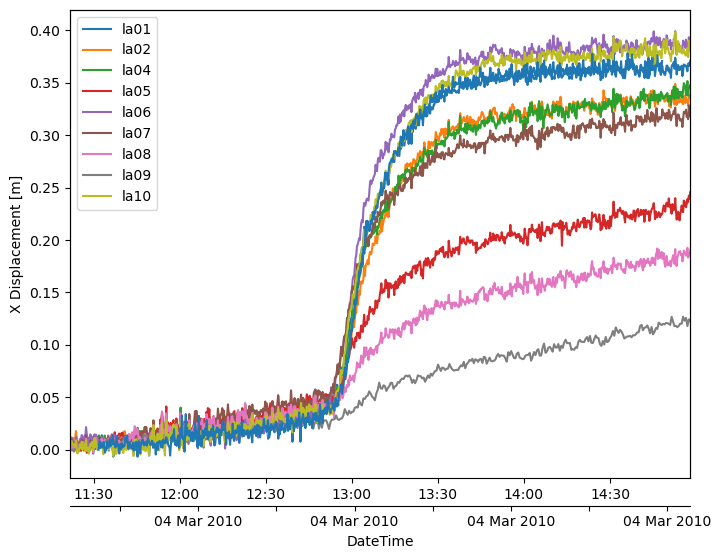

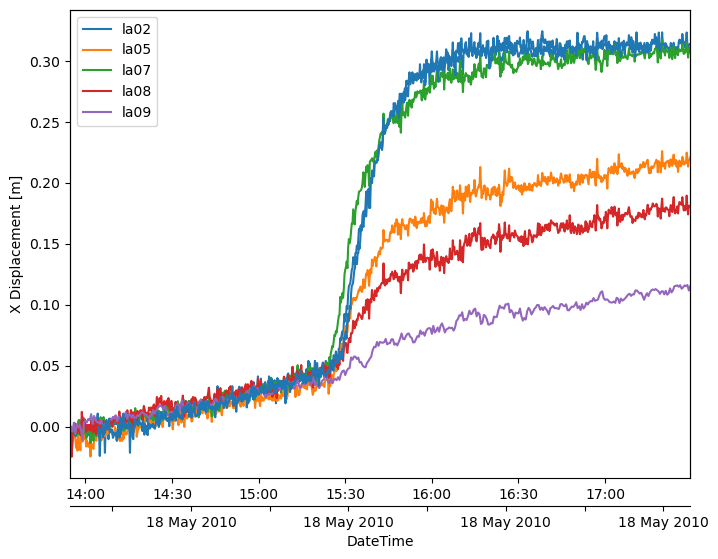

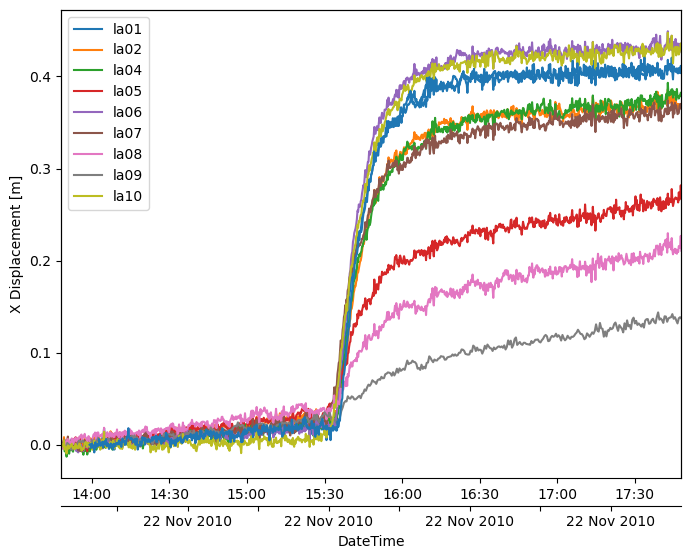

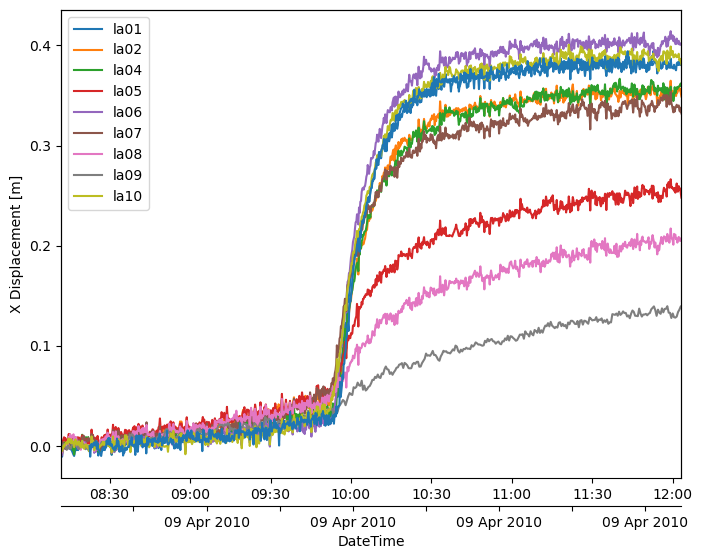

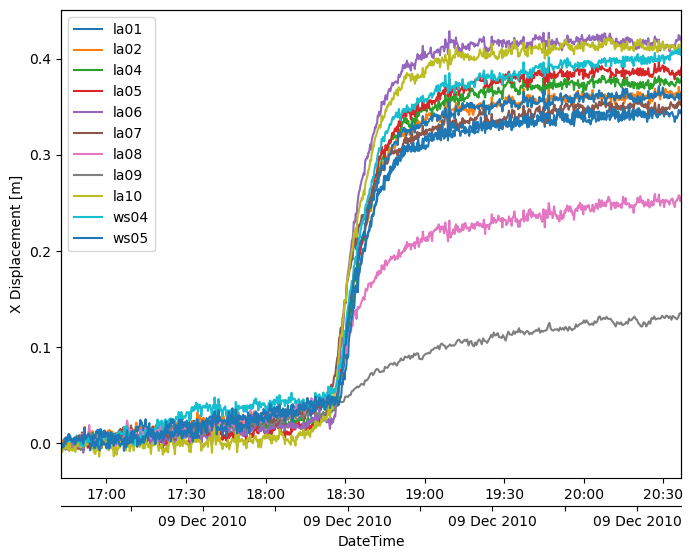

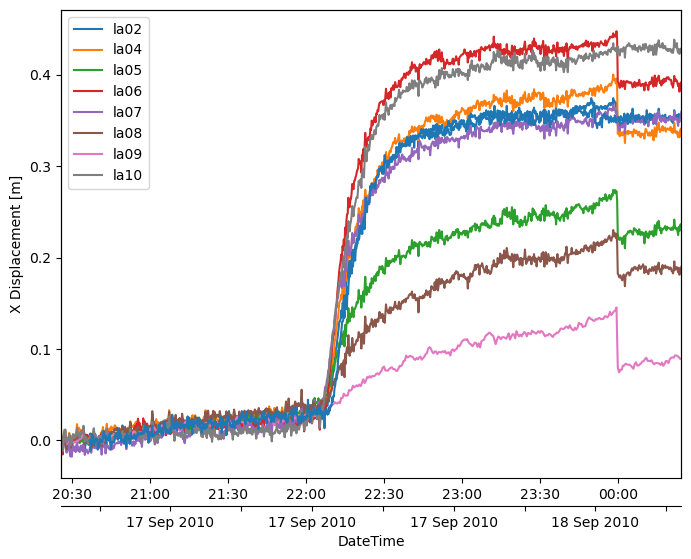

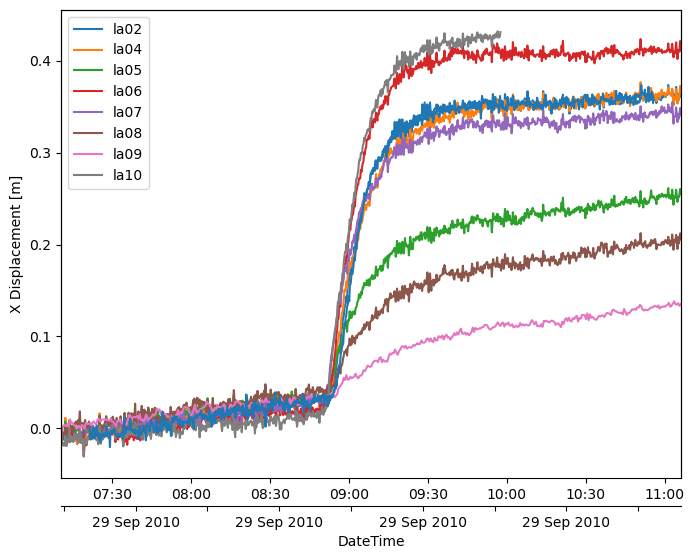

In [23]:
for idx in outliers.index:
    # print(idx)
    my_lib.funcs.plot_event(events_list[idx], var='x')